In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report)
from sklearn.metrics import precision_score, recall_score, f1_score


iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

df['binary_target'] = np.where(df['target'] == 1, 1, 0)

X = df[['petal length (cm)', 'petal width (cm)']].values
y = df['binary_target'].values

In [23]:
import pandas as pd
df=pd.read_csv(r"D:\Users\DELL\Desktop\4th Sem notes\bv\Iris_Data.csv")

In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
iris = load_iris()

In [26]:
X = iris.data[:, :2]

In [27]:
y = (iris.target == 0).astype(int)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n Performance Metrics")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Performance Metrics
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



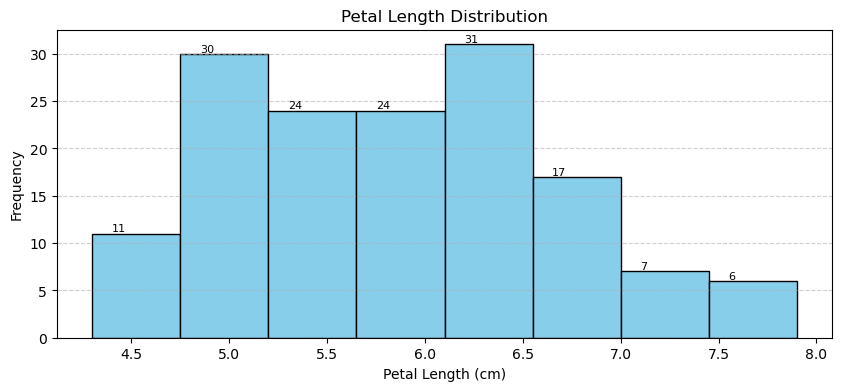

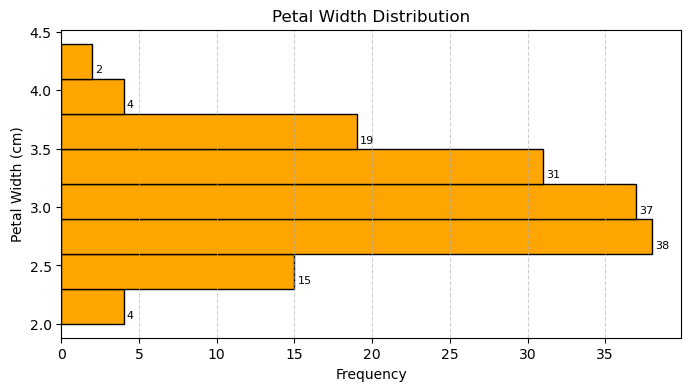

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))

counts1, bins1, patches1 = plt.hist(X[:, 0], bins=8, color='skyblue', edgecolor='black')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Petal Length Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for count, bin_edge in zip(counts1, bins1[:-1]):
    plt.text(bin_edge + 0.1, count + 0.2, str(int(count)), fontsize=8)

plt.show()

# Horizontal
plt.figure(figsize=(8, 4))
counts2, bins2, patches2 = plt.hist(X[:, 1], bins=8, color='orange', edgecolor='black', orientation='horizontal')
plt.ylabel('Petal Width (cm)')
plt.xlabel('Frequency')
plt.title('Petal Width Distribution')
plt.grid(axis='x', linestyle='--', alpha=0.6)

for count, bin_edge in zip(counts2, bins2[:-1]):
    plt.text(count + 0.2, bin_edge + 0.05, str(int(count)), fontsize=8)

plt.show()


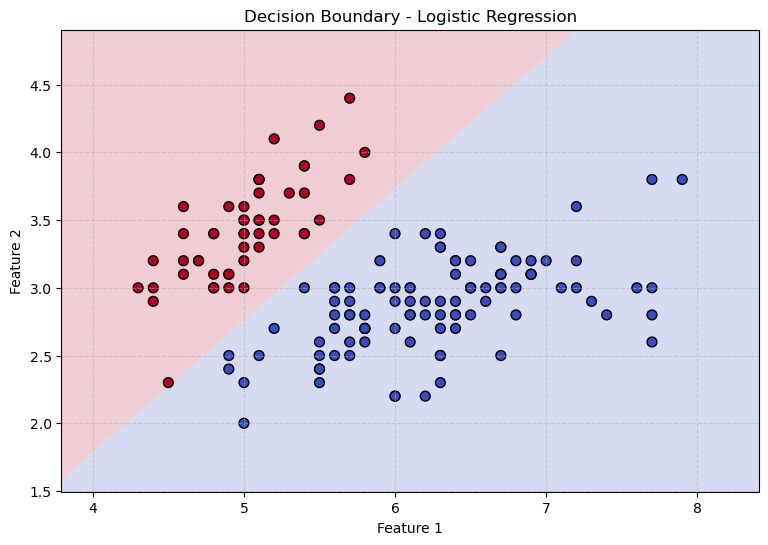

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Set the boundaries for the plot
x_min = X[:, 0].min() - 0.5
x_max = X[:, 0].max() + 0.5
y_min = X[:, 1].min() - 0.5
y_max = X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid_data = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_data)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 6))

plt.pcolormesh(xx, yy, Z, cmap='coolwarm', alpha=0.2, shading='auto')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='black', marker='o')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary - Logistic Regression')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
